In [1]:
import torch
from torch.utils.data import DataLoader
from torch.utils.data import TensorDataset
from torchvision.datasets import MNIST
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

In [16]:
train_data_set = MNIST(root='data', train=True, download=True, transform=ToTensor())
valid_data_set = MNIST(root='data', train=False, download=True, transform=ToTensor())

5


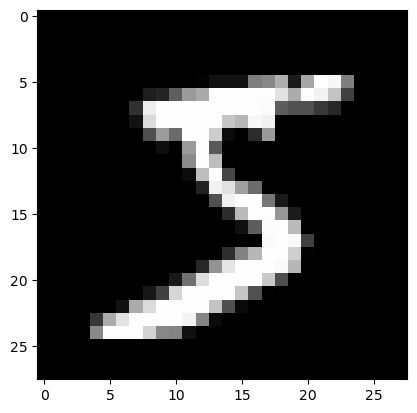

In [10]:
image, label = train_data_set[0]
print(label) # first index label of mnist
plt.imshow(image.float().reshape(28, 28), cmap='grey')

In [ ]:
# create dataloader -- shuffle and loop over batches
batch_size = 64
train_DL = DataLoader(train_data_set, batch_size=batch_size, shuffle=True)
valid_DL = DataLoader(valid_data_set, batch_size=batch_size, shuffle=True)

In [ ]:
from torch import nn
class MNISTModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.lin = nn.Linear(28**2, 10)

#single layer, add and forward more nn.Linear for more layers, will need matrix size adjustments

    def forward(self, data_batch):
        data_batch = data_batch.flatten(1, -1) # (BS, 1, 28, 28) -> (BS, 784)
        return self.lin(data_batch)

model = MNISTModel()

In [14]:
print(model)

MNISTModel(
  (lin): Linear(in_features=784, out_features=10, bias=True)
)


In [15]:
from torch import optim

learning_rate = 0.5

# loss func - torch includes softmax activation
loss_func = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=learning_rate)

# accuracy
def accuracy_func(pred, label_batch):
    pred_class = torch.argmax(pred, dim=1)
    return (pred_class == label_batch).float().mean()

In [17]:
# trainer
def train(dataloader, model, loss_func, optimizer):
    for batch_idx, (data_batch, label_batch) in enumerate(dataloader):
        pred = model(data_batch)
        loss = loss_func(pred, label_batch)

        loss.backward() # autograd
        optimizer.step() # updates params using optimizer (SGD/Adam)
        optimizer.zero_grad() # reset gradients

        if batch_idx % 100 == 0:
            print(f'loss: {loss.item()}, acc: {accuracy_func(pred, label_batch)*100}%')

In [18]:
def test(dataloader, model, loss_func):
    model.eval()
    with torch.no_grad():
        for data_batch, label_batch in dataloader:
            pred = model(data_batch)
            loss = loss_func(pred, label_batch)
            accuracy = accuracy_func(pred, label_batch)

            test_loss, test_accuracy = loss.item(), accuracy.item() * 100

            print(f'test:\n loss: {test_loss:6f}\nacc: {test_accuracy:0.1f}%')

In [21]:
epochs = 2

for epoch in range(epochs):
    train(train_DL, model, loss_func, optimizer)
    test(valid_DL, model, loss_func)

print('-------')

loss: 2.2397663593292236, acc: 26.5625%
loss: 0.40102872252464294, acc: 92.1875%
loss: 0.3468601107597351, acc: 93.75%
loss: 0.3559693694114685, acc: 85.9375%
loss: 0.21372941136360168, acc: 93.75%
loss: 0.46703192591667175, acc: 85.9375%
loss: 0.3001147508621216, acc: 87.5%
loss: 0.273787260055542, acc: 89.0625%
loss: 0.42256641387939453, acc: 92.1875%
loss: 0.26122790575027466, acc: 92.1875%
test:
 loss: 0.356205
acc: 90.6%
test:
 loss: 0.386538
acc: 89.1%
test:
 loss: 0.199156
acc: 93.8%
test:
 loss: 0.270566
acc: 93.8%
test:
 loss: 0.325029
acc: 90.6%
test:
 loss: 0.295299
acc: 89.1%
test:
 loss: 0.313497
acc: 89.1%
test:
 loss: 0.306778
acc: 90.6%
test:
 loss: 0.277135
acc: 92.2%
test:
 loss: 0.187354
acc: 92.2%
test:
 loss: 0.316545
acc: 89.1%
test:
 loss: 0.556691
acc: 87.5%
test:
 loss: 0.301544
acc: 89.1%
test:
 loss: 0.224562
acc: 92.2%
test:
 loss: 0.305750
acc: 87.5%
test:
 loss: 0.197813
acc: 95.3%
test:
 loss: 0.289273
acc: 84.4%
test:
 loss: 0.298117
acc: 92.2%
test:
 lo